<a href="https://colab.research.google.com/github/aezamor3/MAT421/blob/main/MAT_421_Module_G_Homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A previous chapter demonstrated that some functions can be expressed as an infinite sum of polynomials (i.e. Taylor series). Other functions, particularly periodic functions, can be written as an infinite sum of sine and cosine waves. For these functions,

𝑓(𝑥)=𝐴02+∑𝑛=1∞𝐴𝑛 cos(𝑛𝑥)+𝐵𝑛 sin(𝑛𝑥)
It can be shown that the values of 𝐴𝑛 and 𝐵𝑛 can be computed using the following formulas:

𝐴𝑛=1𝜋∫𝜋−𝜋𝑓(𝑥)cos(𝑛𝑥) 𝑑𝑥
𝐵𝑛=1𝜋∫𝜋−𝜋𝑓(𝑥)sin(𝑛𝑥) 𝑑𝑥
Just like Taylor series, functions can be approximated by truncating the Fourier series at some 𝑛=𝑁. Fourier series can be used to approximate some particularly nasty functions such as the step function, and they form the basis of many engineering applications such as signal processing.

Write a function 𝑚𝑦_𝑓𝑜𝑢𝑟𝑖𝑒𝑟_𝑐𝑜𝑒𝑓(𝑓,𝑛), with output [𝐴𝑛,𝐵𝑛], where 𝑓 is an function object that is 2𝜋-periodic. The function 𝑚𝑦_𝑓𝑜𝑢𝑟𝑖𝑒𝑟_𝑐𝑜𝑒𝑓 should compute the 𝑛-th Fourier coefficients, 𝐴𝑛 and 𝐵𝑛, in the Fourier series for 𝑓 defined by the two formulas given earlier. You should use the 𝑞𝑢𝑎𝑑 function to perform the integration.

In [1]:
from scipy.integrate import quad
import numpy as np
import matplotlib.pyplot as plt
def my_fourier_coef(f, n):
  def F1(x):
    return np.cos(n *x) * f(x)
  def F2(x):
    return np.sin(n * x) * f(x)
  A_n= quad(F1, -np.pi, np.pi) [0]
  B_n= quad(F2, -np.pi, np.pi) [0]
  return [A_n/ np.pi, B_n/ np.pi]

In [2]:
from scipy.integrate import cumtrapz
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('seaborn-poster')

def plot_results(f, N):
  x = np.linspace(-np.pi, np.pi, 10000)
  [A0, B0] = my_fourier_coef(f, 0)
  y = A0*np.ones(len(x))/2
  for n in range (1, N):
    [An, Bn] = my_fourier_coef(f, n)
    y += An*np.cos(n*x)+Bn*np.sin(n*x)
  plt.figure(figsize = (10,6))
  plt.plot(x, f(x), label = "analytic")
  plt.plot(x, y, label = "approximate")
  plt.grid()
  plt.tight_layout()
  plt.title(f"{N}th Order Fourier Approximation")
  plt.xlabel('x')
  plt.ylabel('f(x)')
  plt.legend()
  plt.show()

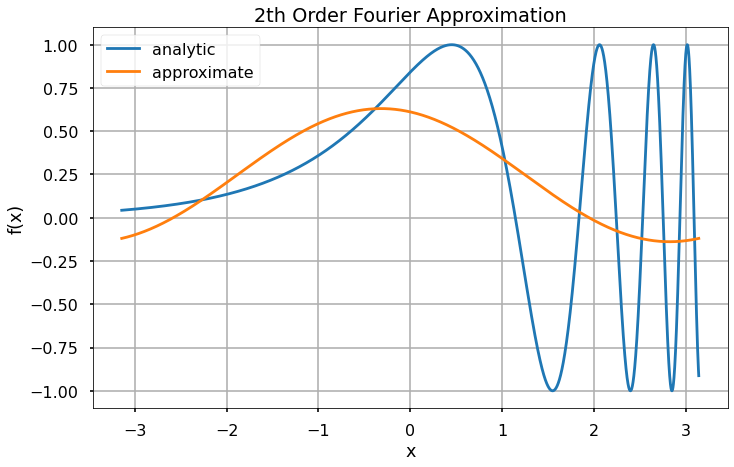

In [3]:
 f = lambda x: np.sin(np.exp(x))
 N = 2
 plot_results(f, N)

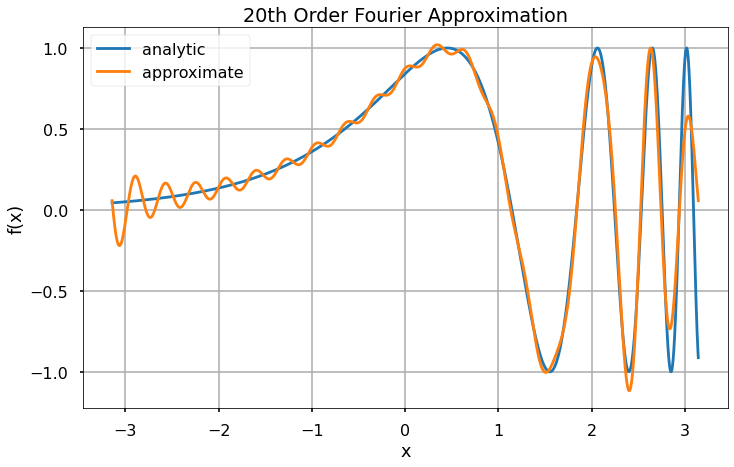

In [4]:
 N = 20
 plot_results(f, N)

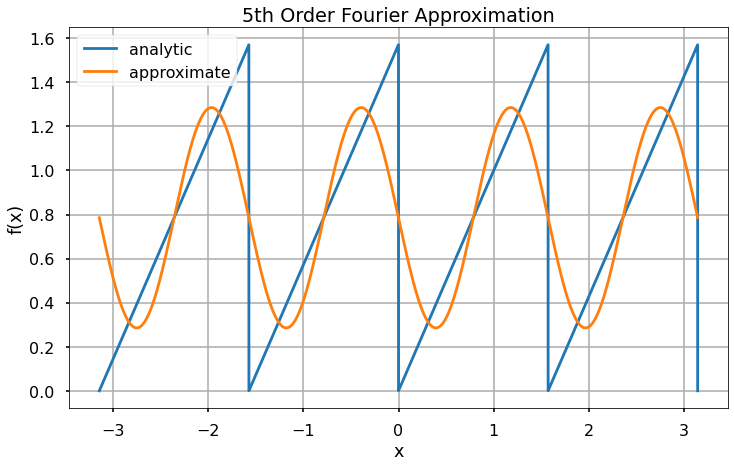

In [5]:
 f = lambda x: np.mod(x, np.pi/2)
 N = 5
 plot_results(f, N)

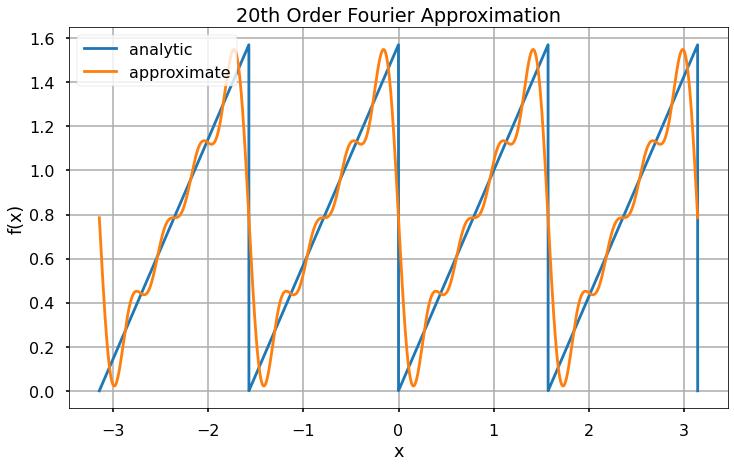

In [6]:
 N = 20
 plot_results(f, N)

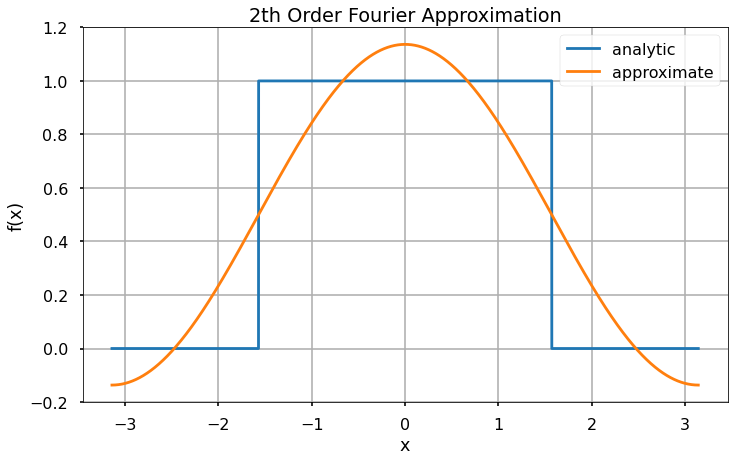

In [7]:
 f = lambda x: (x > -np.pi/2) & (x < np.pi/2)
 N = 2
 plot_results(f, N)

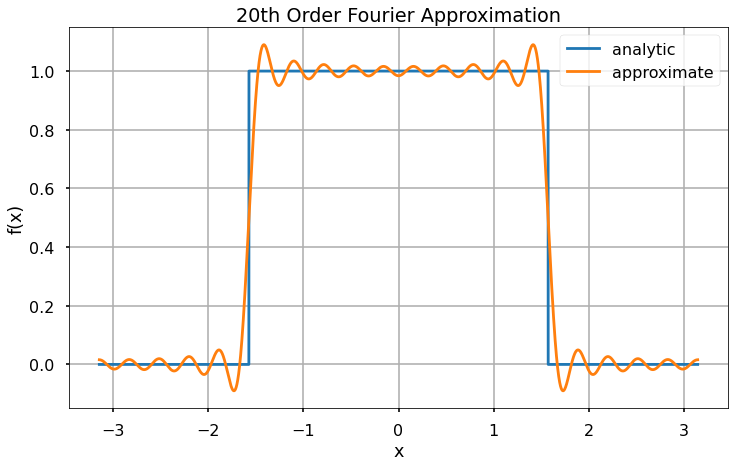

In [8]:
 N = 20
 plot_results(f, N)